CET313 - Artificial Intelligence
(Intelligent Prototype Development)

In [2]:
#Installing Necessary Pipelines
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scikit-learn

In [3]:
#Installing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [4]:
#Read File
df = pd.read_csv("alzheimers_disease_data.csv")
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [5]:
#summary statistics of each column
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
#Columns
print("Columns Name: " ,df.columns)

Columns Name:  Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')


In [7]:
#Check for missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTas

In [8]:
#Check for duplicate rows
print("Duplicate Rows:")
print(df.duplicated().sum())

Duplicate Rows:
0


In [9]:
#Datatype of all data
print("Data Type:")
print(df.dtypes)

Data Type:
PatientID                      int64
Age                            int64
Gender                         int64
Ethnicity                      int64
EducationLevel                 int64
BMI                          float64
Smoking                        int64
AlcoholConsumption           float64
PhysicalActivity             float64
DietQuality                  float64
SleepQuality                 float64
FamilyHistoryAlzheimers        int64
CardiovascularDisease          int64
Diabetes                       int64
Depression                     int64
HeadInjury                     int64
Hypertension                   int64
SystolicBP                     int64
DiastolicBP                    int64
CholesterolTotal             float64
CholesterolLDL               float64
CholesterolHDL               float64
CholesterolTriglycerides     float64
MMSE                         float64
FunctionalAssessment         float64
MemoryComplaints               int64
BehavioralProblems         

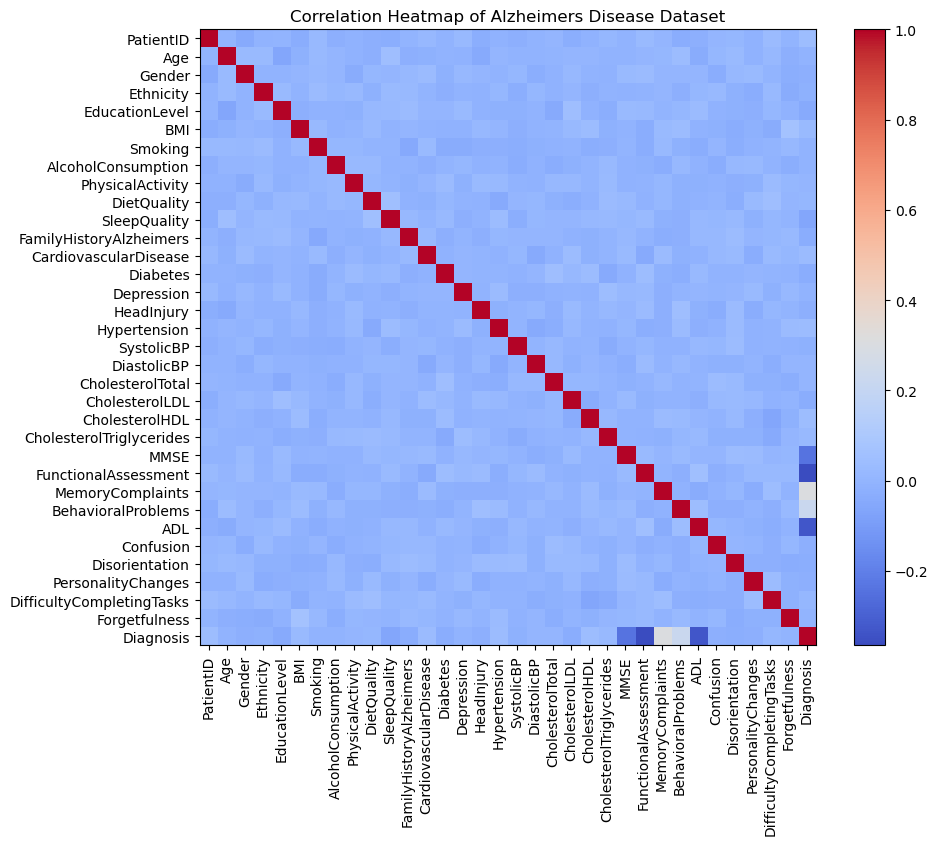

In [10]:
#Calculating correlations
correlations = df.select_dtypes(include=['int64', 'float64']).corr()
#Creating a heatmap to visualise the correlations
plt.figure(figsize=(10, 8))
plt.imshow(correlations, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlations)), correlations.columns, rotation=90)
plt.yticks(range(len(correlations)), correlations.columns)
plt.title('Correlation Heatmap of Alzheimers Disease Dataset')
plt.show()

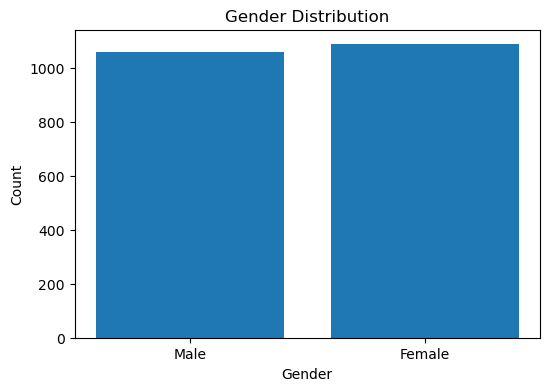

In [11]:
#Binary Data Visualization
#Gender Distribution
#0 - Male, 1 - Female
plt.figure(figsize=(6, 4))
plt.bar(['Male','Female'], np.bincount(df['Gender']))
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

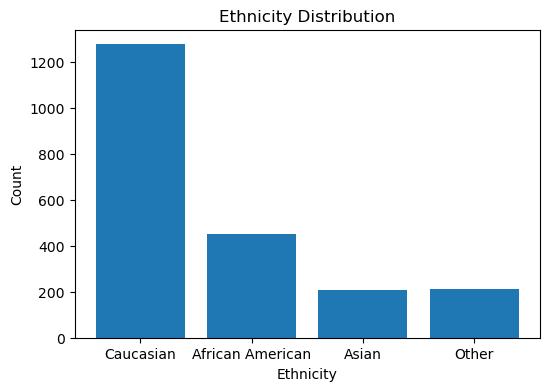

In [12]:
#Ethnicity Distribution
#0 - Caucasian, 1 - African American, 2 - Asian, 3 - Other
plt.figure(figsize=(6, 4))
plt.bar(['Caucasian','African American', 'Asian', 'Other'], np.bincount(df['Ethnicity']))
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.title('Ethnicity Distribution')
plt.show()

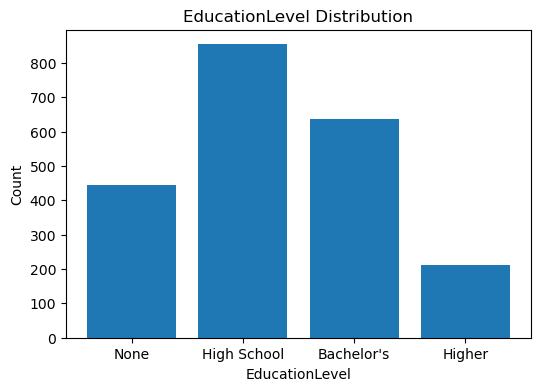

In [13]:
#EducationLevel Distribution
#0 - None, 1 - High School, 2 - Bachelor's, 3 - Higher
plt.figure(figsize=(6, 4))
plt.bar(['None','High School', "Bachelor's", 'Higher'], np.bincount(df['EducationLevel']))
plt.xlabel('EducationLevel')
plt.ylabel('Count')
plt.title('EducationLevel Distribution')
plt.show()

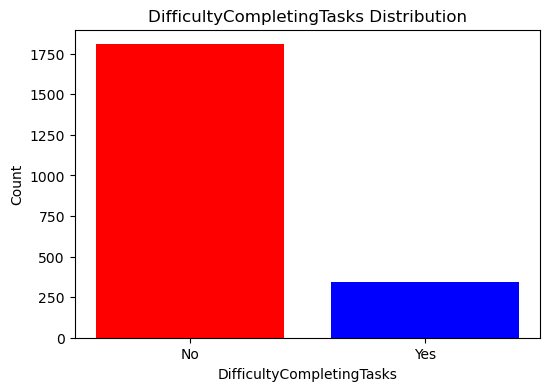

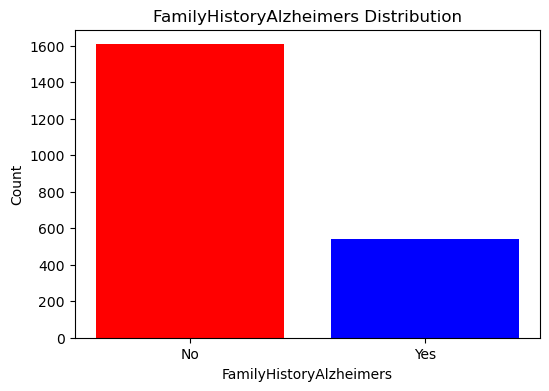

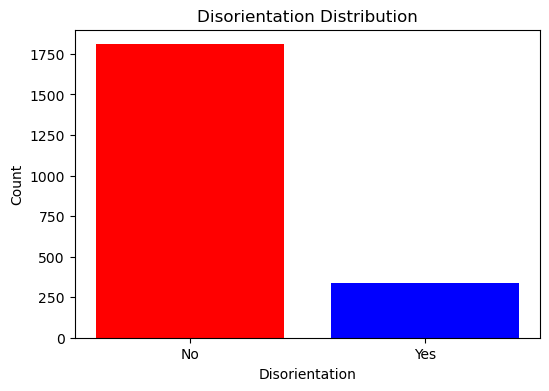

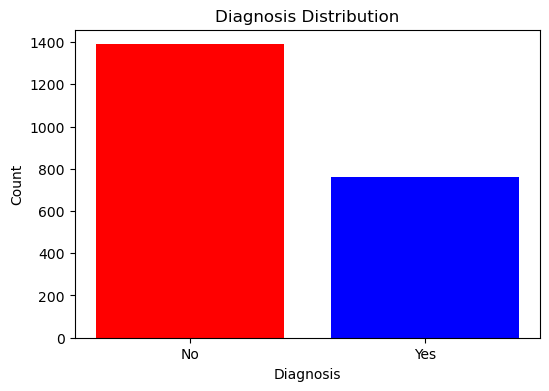

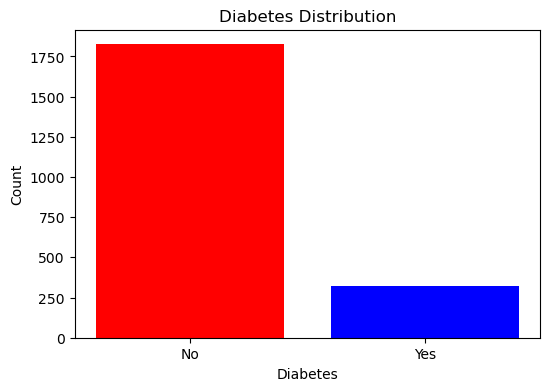

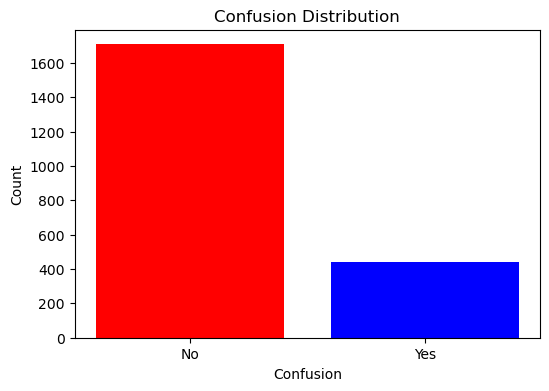

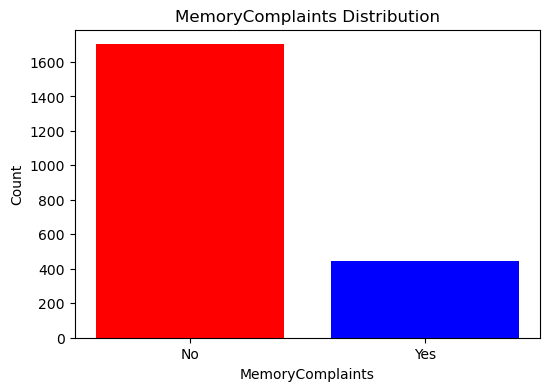

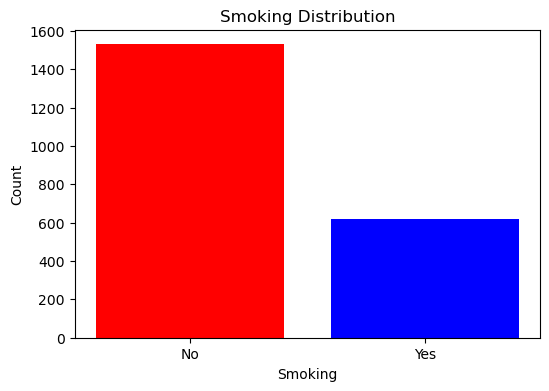

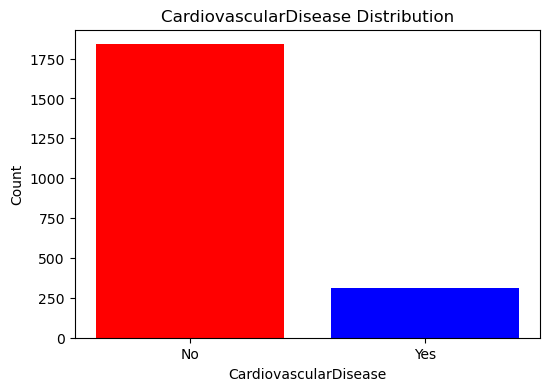

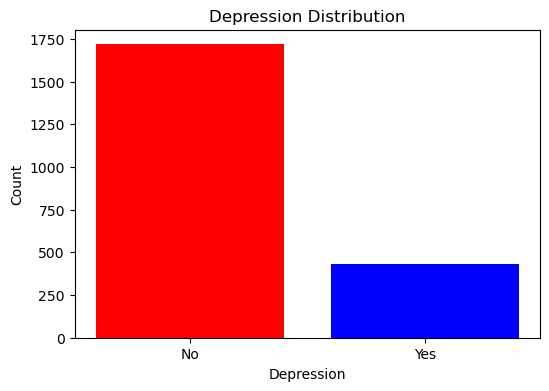

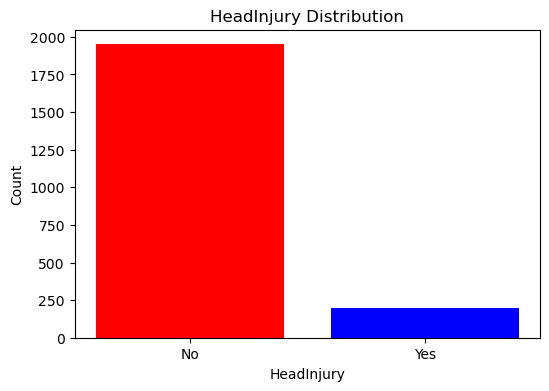

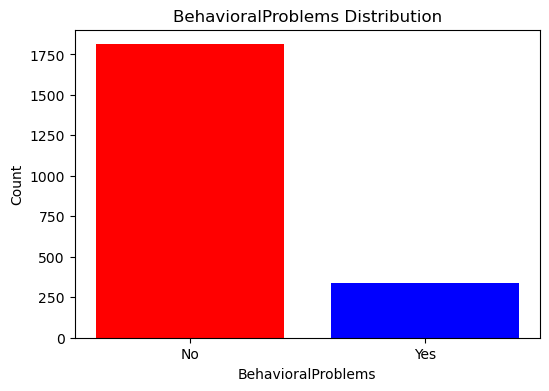

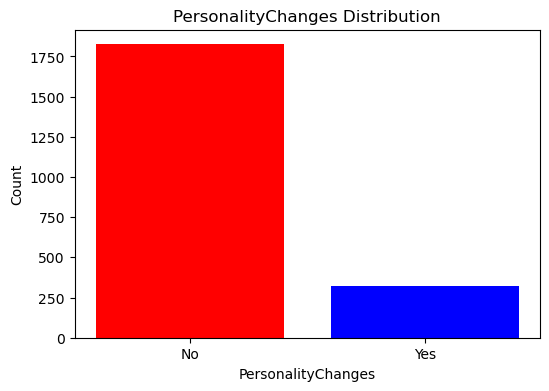

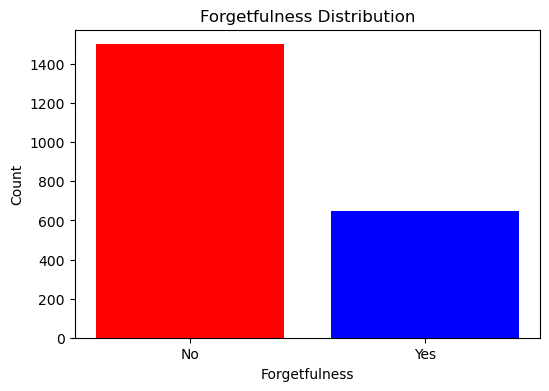

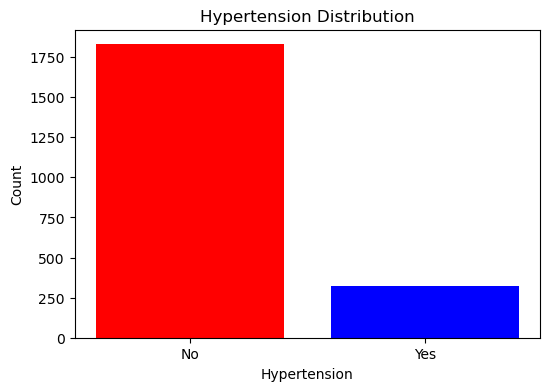

In [14]:
#Binary Data Visualization
#0 - No, 1 - Yes
labels = {'Smoking', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression',
    'HeadInjury', 'Hypertension', 'MemoryComplaints', 'BehavioralProblems', 'Confusion', 'Disorientation',
    'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis'}

for label in labels:
    plt.figure(figsize=(6, 4))
    plt.bar(['No','Yes'], np.bincount(df[label]), color=['red', 'blue'])
    plt.xlabel(label)
    plt.ylabel('Count')
    plt.title(label + ' Distribution')
    plt.show()

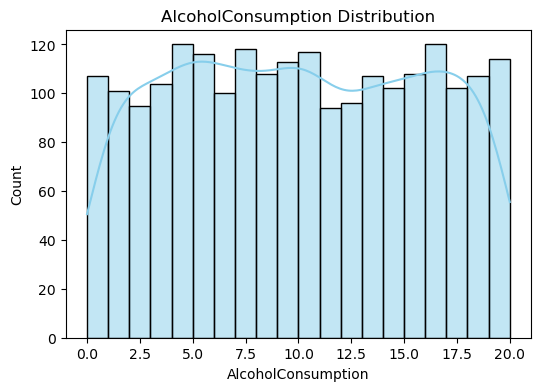

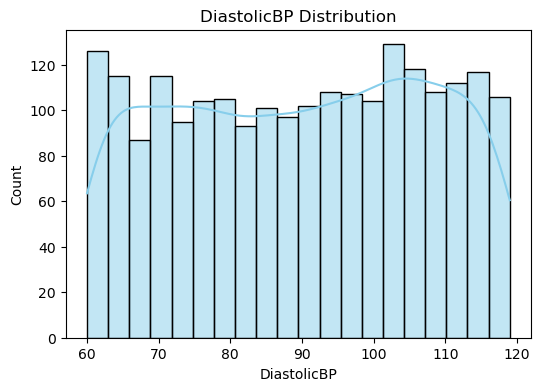

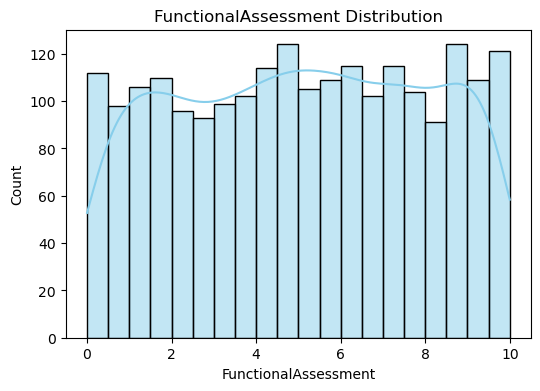

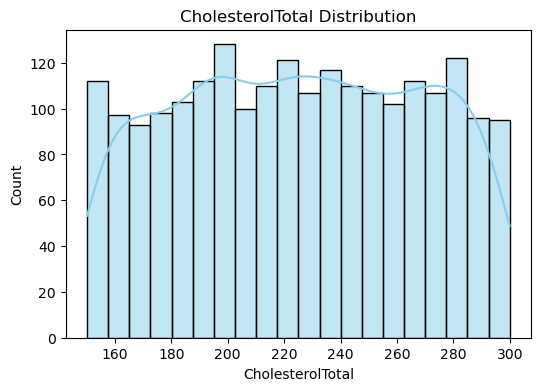

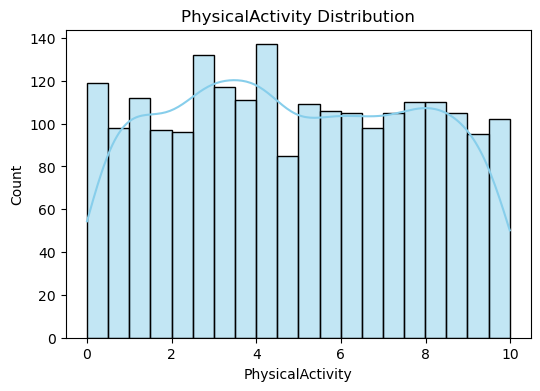

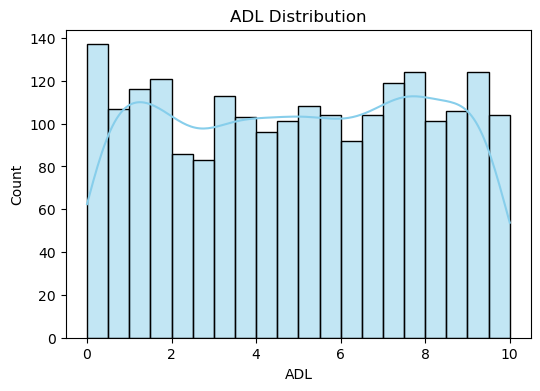

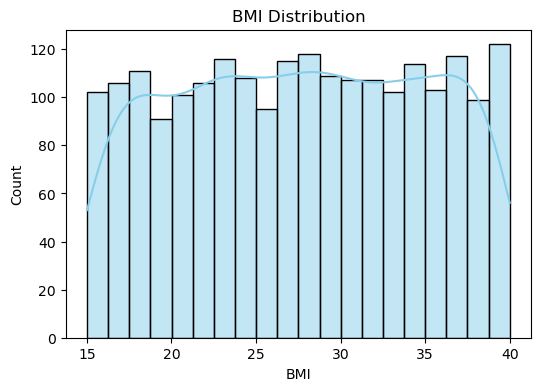

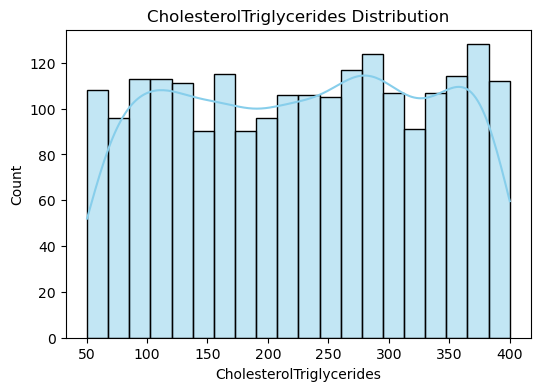

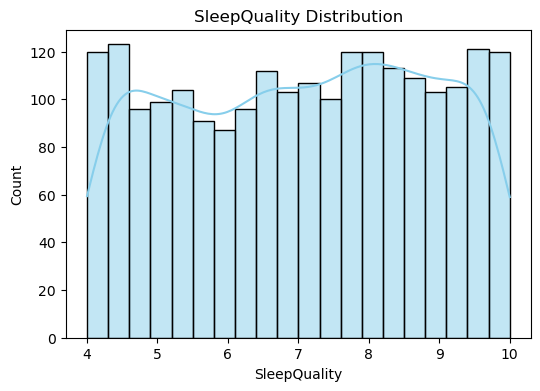

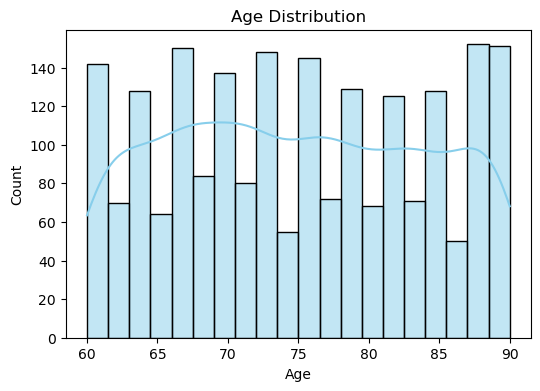

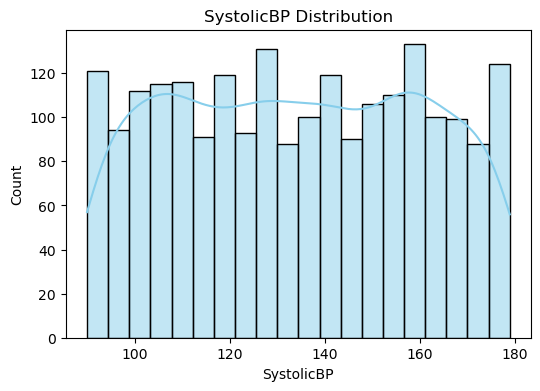

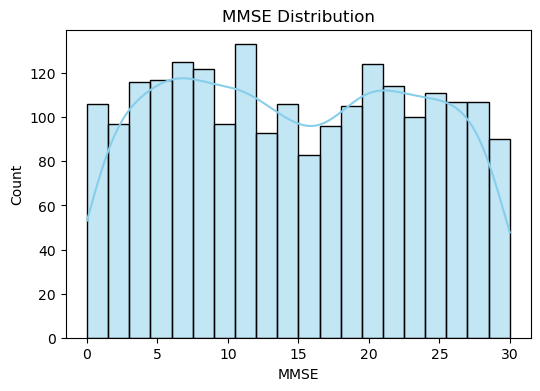

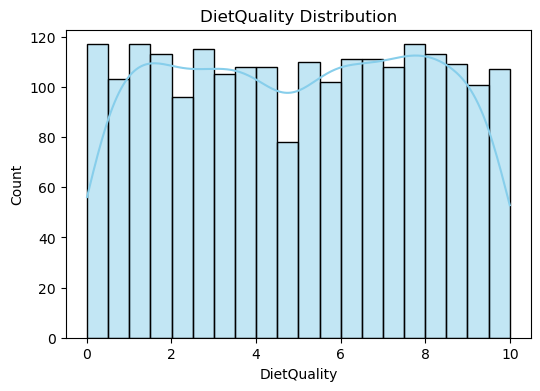

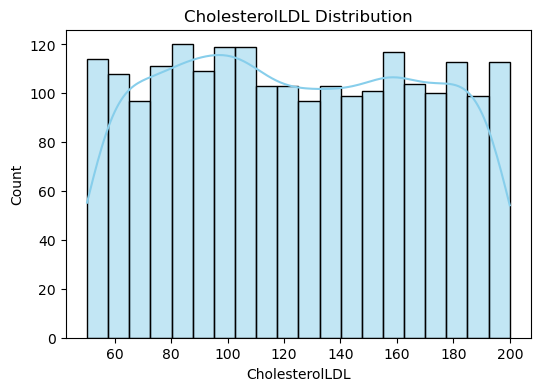

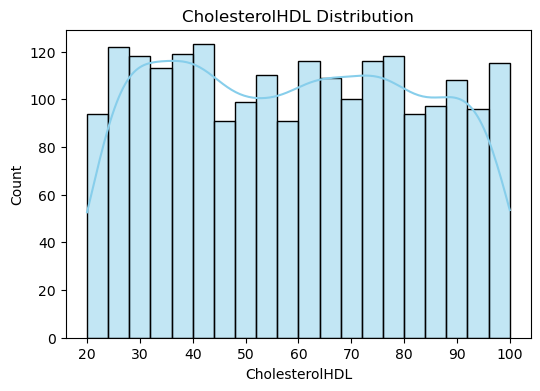

In [15]:
#Numerical Data Visualization
numerical_data = {
    'Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal',
    'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL'
}

for data in numerical_data:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[data], bins=20, kde=True, color='skyblue', edgecolor='black')
    plt.xlabel(data)
    plt.ylabel('Count')
    plt.title(data+' Distribution')
    plt.show()

In [16]:
#Setting feature and target variables
X = df.drop(columns = ['PatientID', 'DoctorInCharge', 'Diagnosis'])
y = df['Diagnosis']

#Split data for training model and testing model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
#Model Evaluation Function
def run_model(classifier, name):
    classifier.fit(X_train, y_train)

    #Predicting the test set results
    y_pred = classifier.predict(X_test)

    #Evaluating the model
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(name)
    print("Accuracy:", accuracy)
    print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Undiagnosed', 'Diagnosed']))
    print("\nConfusion Matrix:\n", conf_matrix)
    
    #Confusion Matrix
    plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
    plt.title(f'Confusion Matrix for {name} Model')
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['Undiagnosed', 'Diagnosed'])
    plt.yticks(tick_marks, ['Undiagnosed', 'Diagnosed'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    #Plotting the ROC curve for model
    y_pred_proba = classifier.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label='ROC Curve')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({name})')
    plt.legend(loc='lower right')
    plt.show()
    
    return accuracy

Logistic Regression
Accuracy: 0.8302325581395349

Classification Report:
               precision    recall  f1-score   support

 Undiagnosed       0.85      0.90      0.87       277
   Diagnosed       0.79      0.71      0.75       153

    accuracy                           0.83       430
   macro avg       0.82      0.80      0.81       430
weighted avg       0.83      0.83      0.83       430


Confusion Matrix:
 [[248  29]
 [ 44 109]]


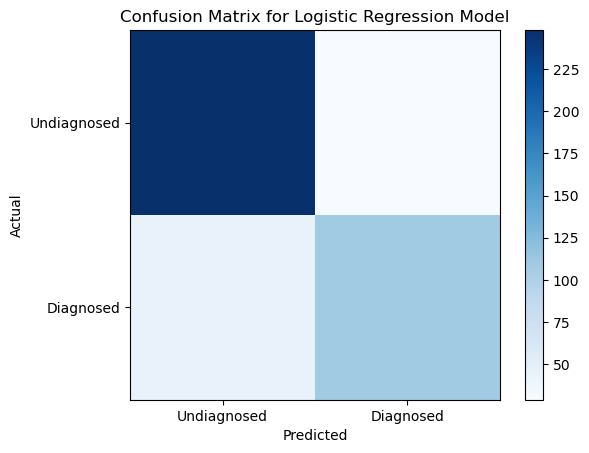

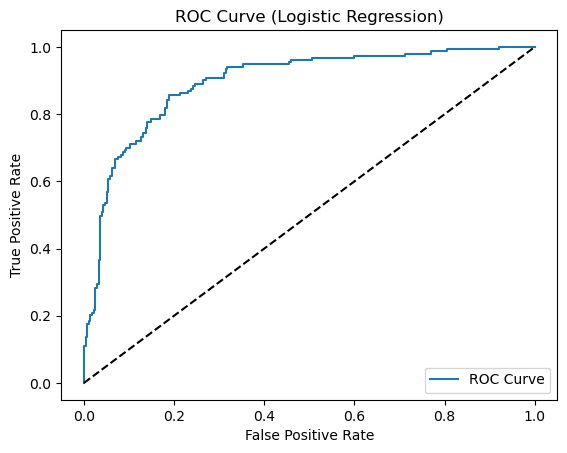

Decision Tree
Accuracy: 0.9069767441860465

Classification Report:
               precision    recall  f1-score   support

 Undiagnosed       0.92      0.94      0.93       277
   Diagnosed       0.89      0.84      0.87       153

    accuracy                           0.91       430
   macro avg       0.90      0.89      0.90       430
weighted avg       0.91      0.91      0.91       430


Confusion Matrix:
 [[261  16]
 [ 24 129]]


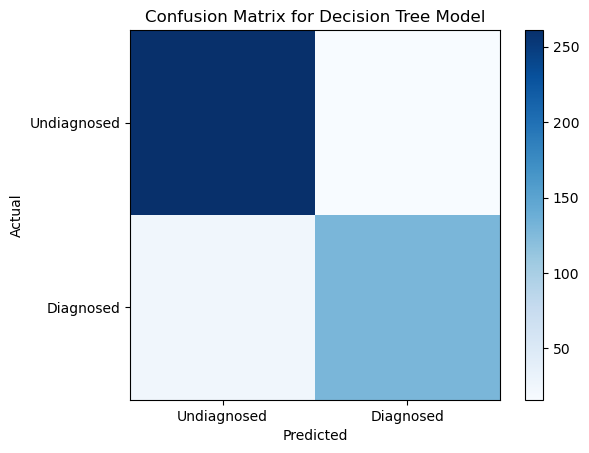

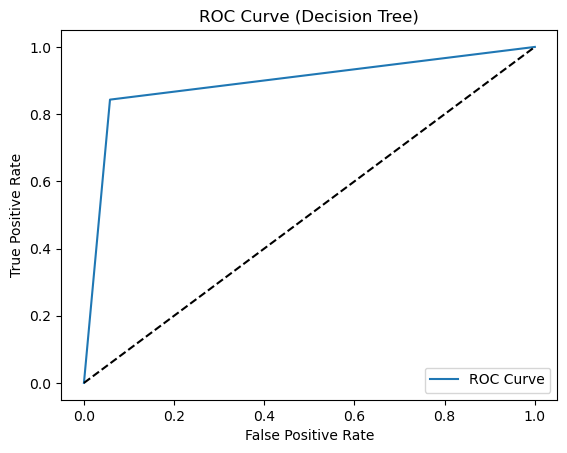

Support Vector Classification
Accuracy: 0.8325581395348837

Classification Report:
               precision    recall  f1-score   support

 Undiagnosed       0.85      0.90      0.87       277
   Diagnosed       0.80      0.71      0.75       153

    accuracy                           0.83       430
   macro avg       0.82      0.80      0.81       430
weighted avg       0.83      0.83      0.83       430


Confusion Matrix:
 [[250  27]
 [ 45 108]]


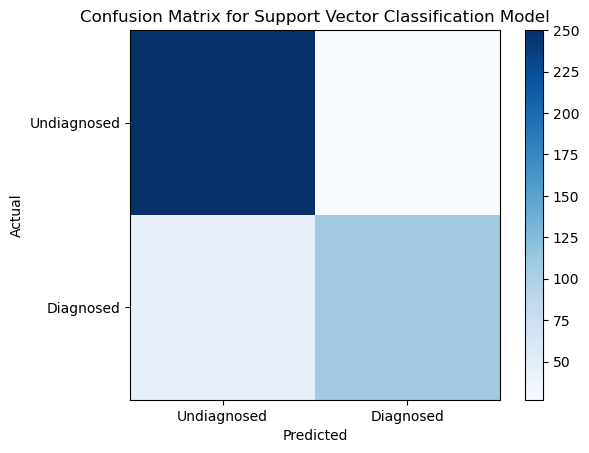

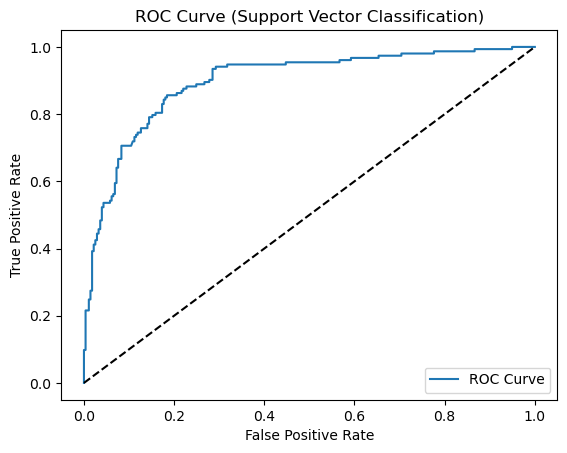

Random Forest
Accuracy: 0.9255813953488372

Classification Report:
               precision    recall  f1-score   support

 Undiagnosed       0.91      0.98      0.94       277
   Diagnosed       0.96      0.82      0.89       153

    accuracy                           0.93       430
   macro avg       0.94      0.90      0.92       430
weighted avg       0.93      0.93      0.92       430


Confusion Matrix:
 [[272   5]
 [ 27 126]]


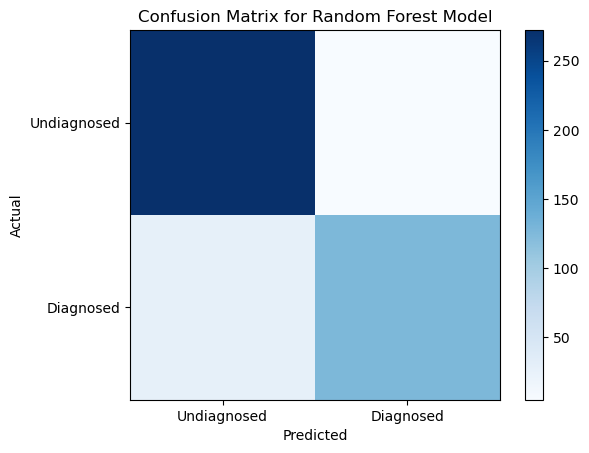

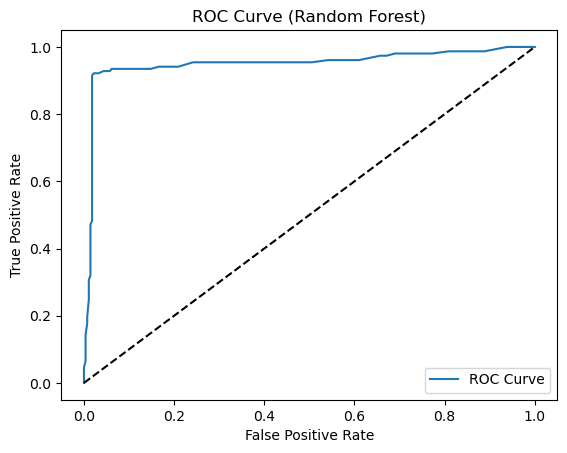

K-Neighbors
Accuracy: 0.7186046511627907

Classification Report:
               precision    recall  f1-score   support

 Undiagnosed       0.75      0.86      0.80       277
   Diagnosed       0.64      0.47      0.54       153

    accuracy                           0.72       430
   macro avg       0.69      0.66      0.67       430
weighted avg       0.71      0.72      0.71       430


Confusion Matrix:
 [[237  40]
 [ 81  72]]


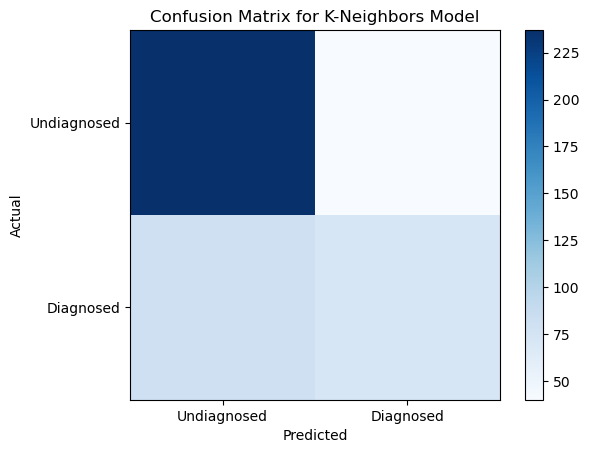

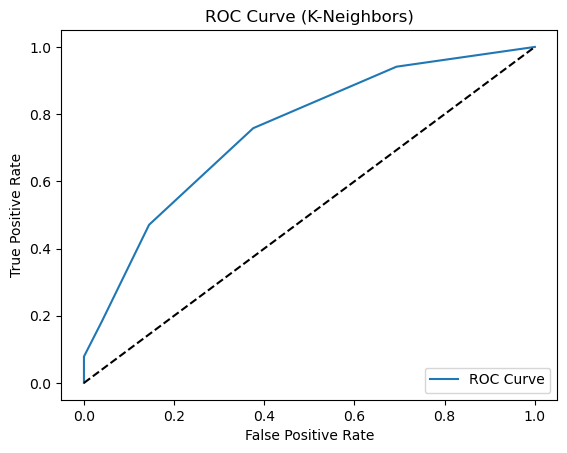

In [18]:
#Setting name and model evaluation
models = {
    "Logistic Regression": run_model(LogisticRegression(random_state=42), "Logistic Regression"),
    "Decision Tree": run_model(DecisionTreeClassifier(random_state=42), "Decision Tree"),
    "Support Vector Classification": run_model(SVC(probability=True, random_state=42), "Support Vector Classification"),
    "Random Forest": run_model(RandomForestClassifier(random_state=42), "Random Forest"),
    "K-Neighbors": run_model(KNeighborsClassifier(), "K-Neighbors")
}

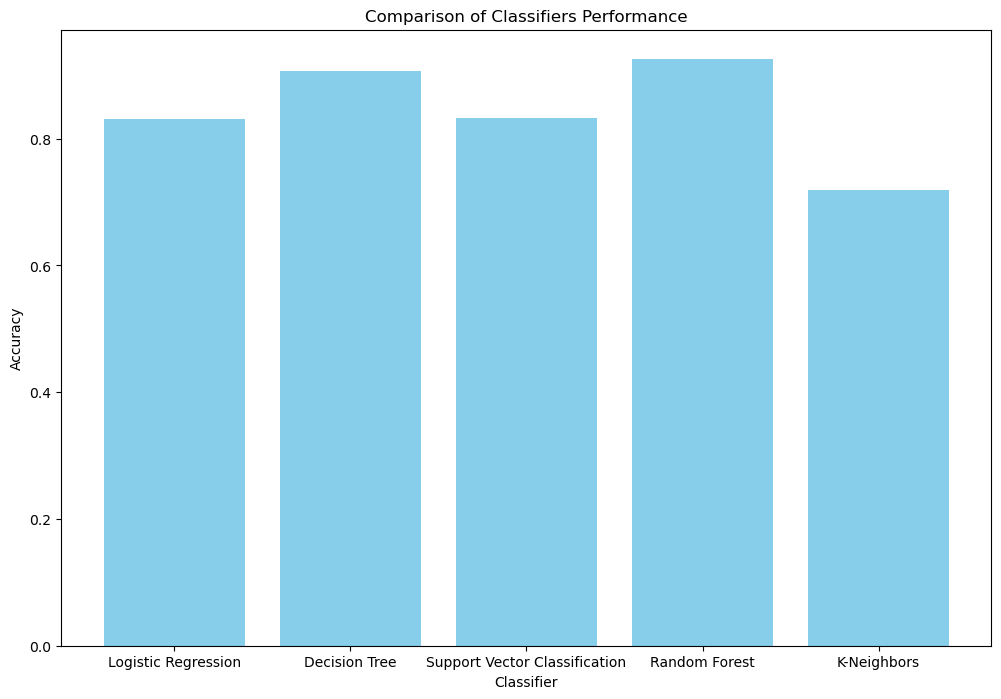

In [22]:
names = []
accuracies = []
#Models Performance Results and Accuracy Summary
for name, accuracy in models.items():
    names.append(name)
    accuracies.append(accuracy)
    
#Visualization of Classifiers' Accuracies Comparison
plt.figure(figsize=(12, 8))
plt.bar(names, accuracies, color='skyblue')
plt.title("Comparison of Classifiers Performance")
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.show()

Among five models, Random Forest Classifier Model performs the best.